In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [76]:
import pandas as pd
# This is fine since it's an Excel file
PCOS_woinf = pd.read_excel("/content/PCOS_data_without_infertility.xlsx", sheet_name="Full_new")
# This should be read using read_csv
PCOS_inf = pd.read_csv("/content/PCOS_infertility.csv")

In [77]:
print(PCOS_inf.head())
print(PCOS_inf.shape)

   Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26  
(541, 6)


In [78]:
print(PCOS_woinf.head())
print(PCOS_woinf.shape)

   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0            

## DATA PREPROCESSING

Merging the two files as per patient file no. and dropping the repeated features

In [79]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes=['','_y'],how='left')
#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)
#Taking a look at the dataset
data.head()
print(data.shape)

(541, 44)


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [57]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


## Encoding categorical variables (dtype objects)

In [80]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values.
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]

<ipython-input-80-2209a674dd8f>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
<ipython-input-80-2209a674dd8f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

### EXPLORATORY DATA ANALYSIS

In [59]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


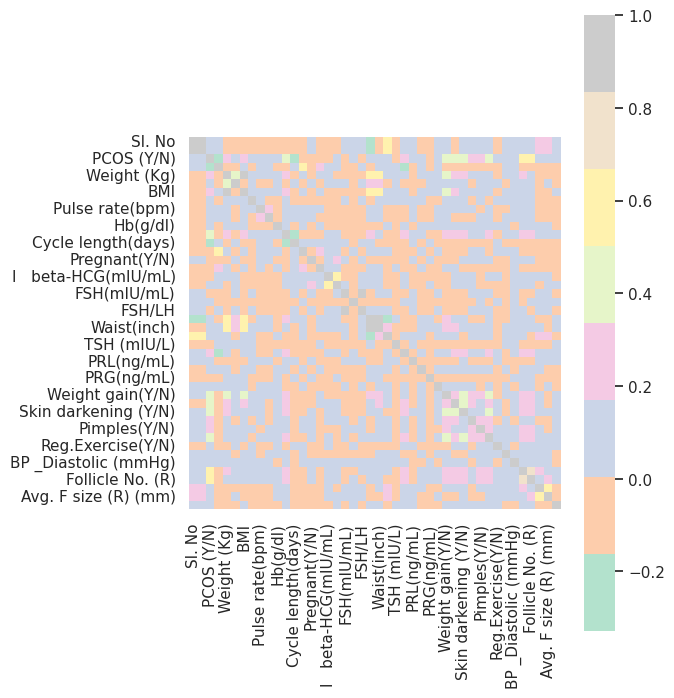

In [81]:
#Examaning a correlation matrix of all the features
corrmat = data.corr()
plt.subplots(figsize=(6,8))
sns.heatmap(corrmat,cmap="Pastel2", square=True);

In [82]:
#How all the features correlate with the PCOS
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

,PCOS (Y/N)
PCOS (Y/N),1.000000
Follicle No. (R),0.648327
Follicle No. (L),0.603346
Skin darkening (Y/N),0.475733
hair growth(Y/N),0.464667
Weight gain(Y/N),0.441047
Cycle(R/I),0.401644
Fast food (Y/N),0.376183
Pimples(Y/N),0.286077
AMH(ng/mL),0.264141


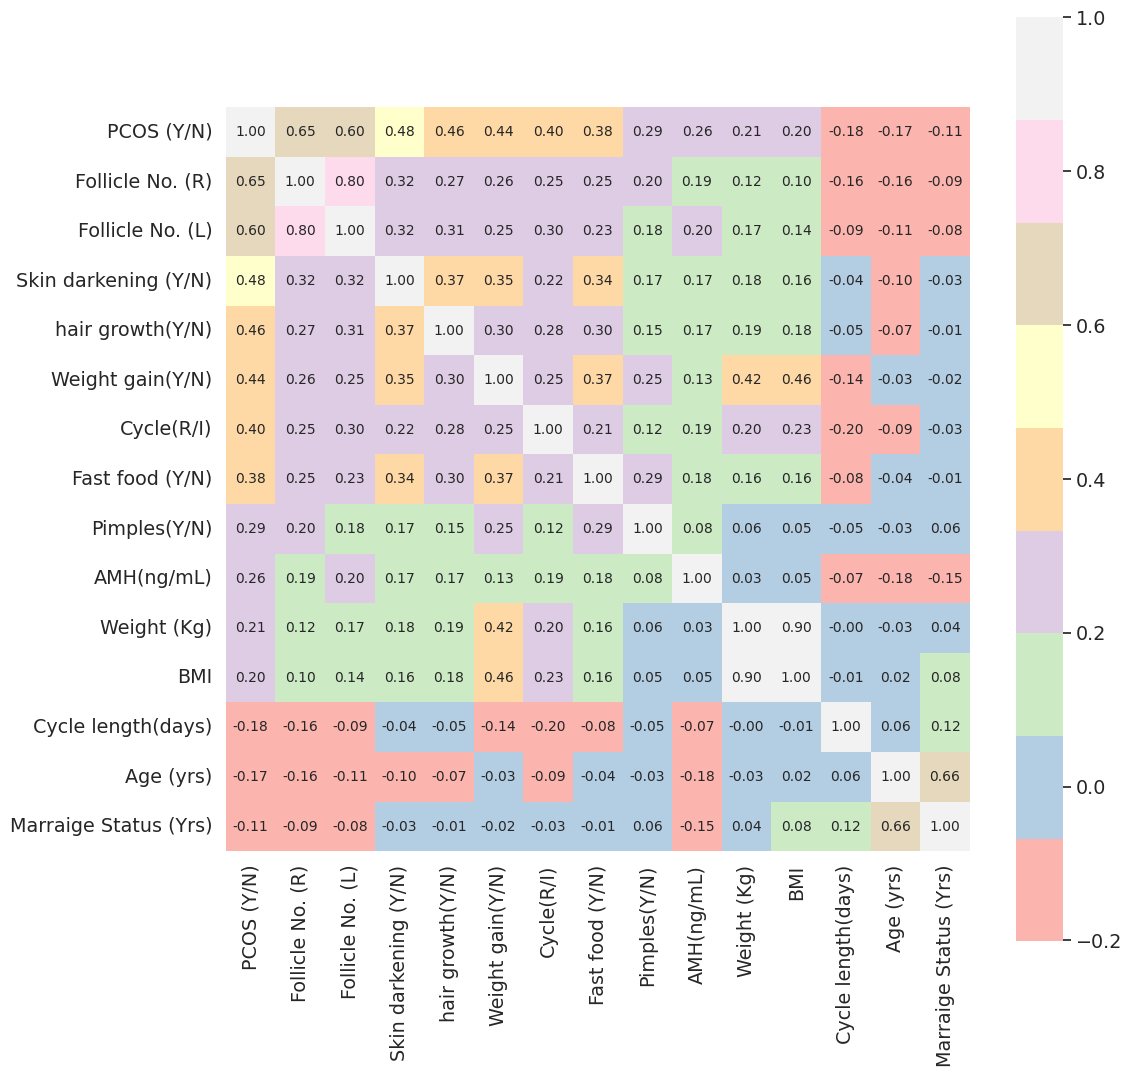

In [83]:
#Having a look at features bearing significant correlation
import numpy as np
plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n)

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [84]:
data.drop(['Follicle No. (R)', 'BMI'], axis=1, inplace=True)

In [85]:
print(data.columns.tolist())

['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


# EDA

In [86]:
numerical_columns = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'Pulse rate(bpm)', 'RR (breaths/min)',
    'Hb(g/dl)', 'Cycle length(days)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
    'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'PRL(ng/mL)',
    'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
    'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Avg. F size (L) (mm)',
    'Avg. F size (R) (mm)', 'Endometrium (mm)'
]

categorical_columns = [
    'PCOS (Y/N)', 'Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)',
    'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
    'Fast food (Y/N)', 'Reg.Exercise(Y/N)'
]

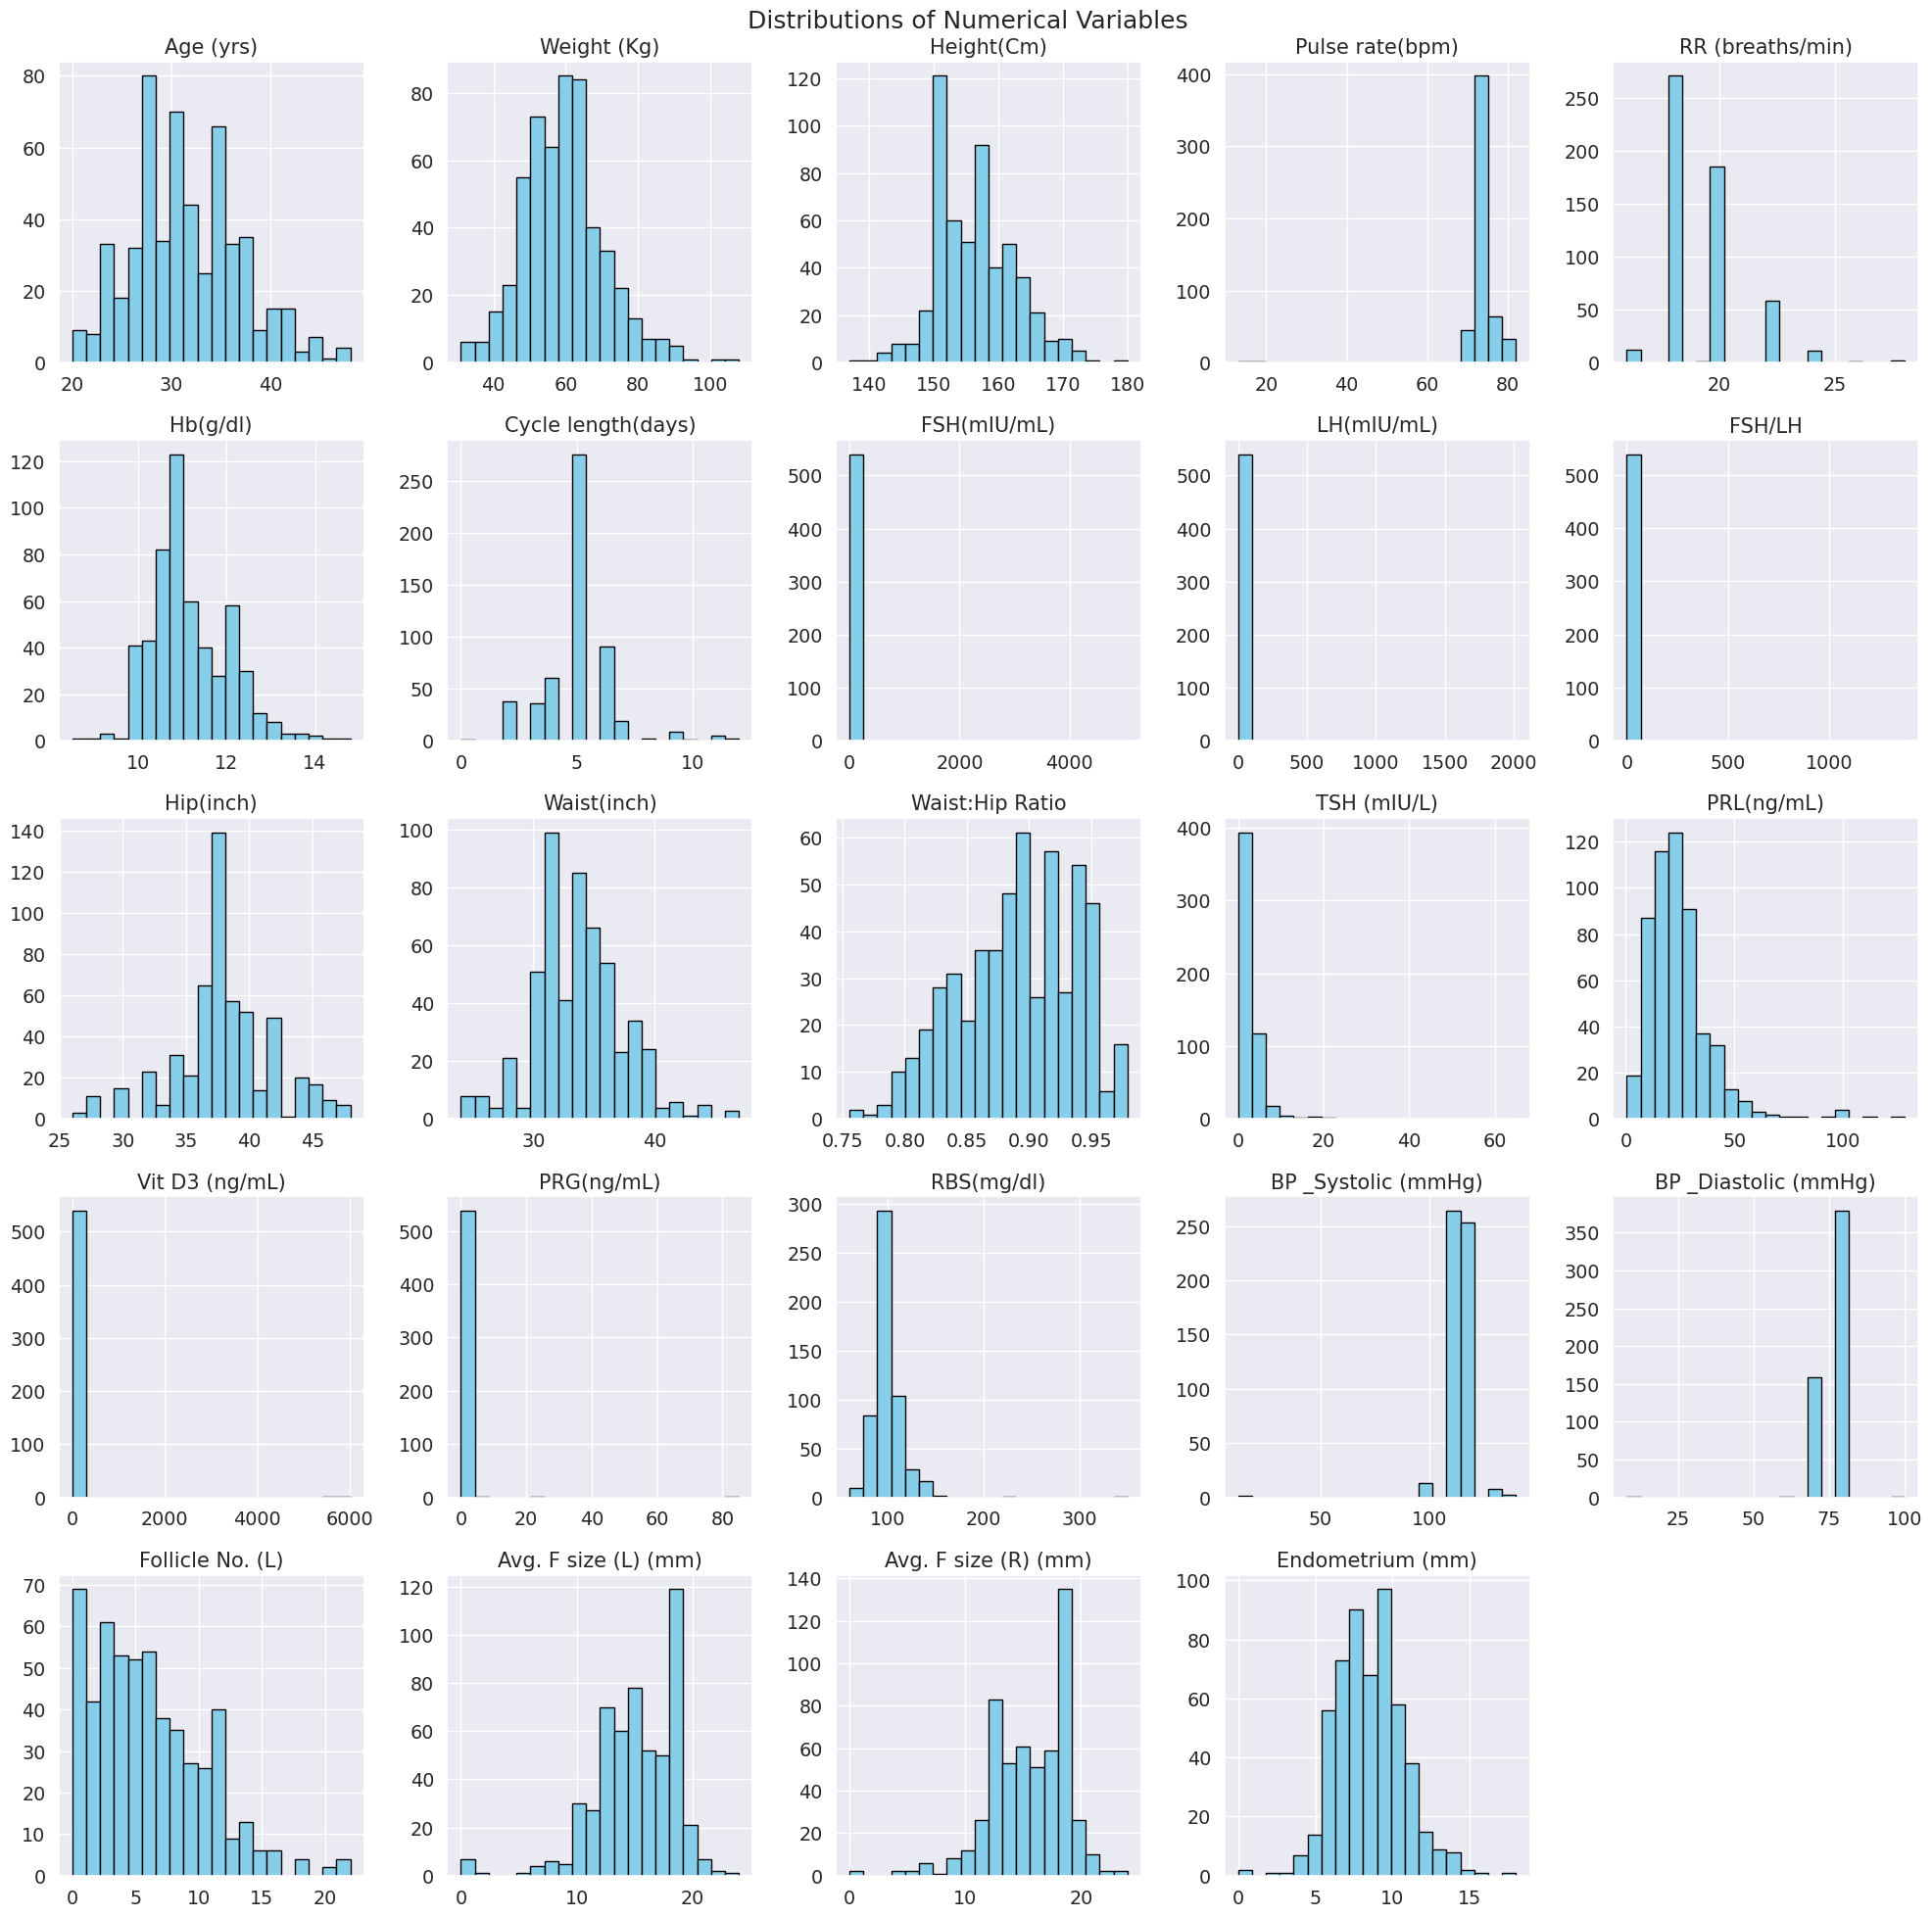

In [87]:
import matplotlib.pyplot as plt

data[numerical_columns].hist(figsize=(20, 20), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Variables', fontsize=18)
plt.tight_layout()
plt.show()


In [88]:
#Doing some more preprocessing
data['Cycle_Length_Category'] = pd.cut(
    data['Cycle length(days)'],
    bins=[0, 3, 5, 7, 10, 15],
    labels=["Short", "Moderate", "Normal", "Long", "Very Long"]
)

In [89]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Sl. No                  541 non-null    int64   
 1   Patient File No.        541 non-null    int64   
 2   PCOS (Y/N)              541 non-null    int64   
 3   Age (yrs)               541 non-null    int64   
 4   Weight (Kg)             541 non-null    float64 
 5   Height(Cm)              541 non-null    float64 
 6   Blood Group             541 non-null    int64   
 7   Pulse rate(bpm)         541 non-null    int64   
 8   RR (breaths/min)        541 non-null    int64   
 9   Hb(g/dl)                541 non-null    float64 
 10  Cycle(R/I)              541 non-null    int64   
 11  Cycle length(days)      541 non-null    int64   
 12  Marraige Status (Yrs)   541 non-null    float64 
 13  Pregnant(Y/N)           541 non-null    int64   
 14  No. of aborptions       54

In [90]:
from numpy import log1p

log_candidates = ['FSH/LH', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'TSH (mIU/L)', 'RBS(mg/dl)', 'PRL(ng/mL)']

for col in log_candidates:
    if col in data.columns:
        data[f'log_{col}'] = log1p(data[col])       # Add transformed version
        data.drop(col, axis=1, inplace=True)        # Optionally drop original
    else:
        print(f"⚠️ Column '{col}' not found. Skipping.")


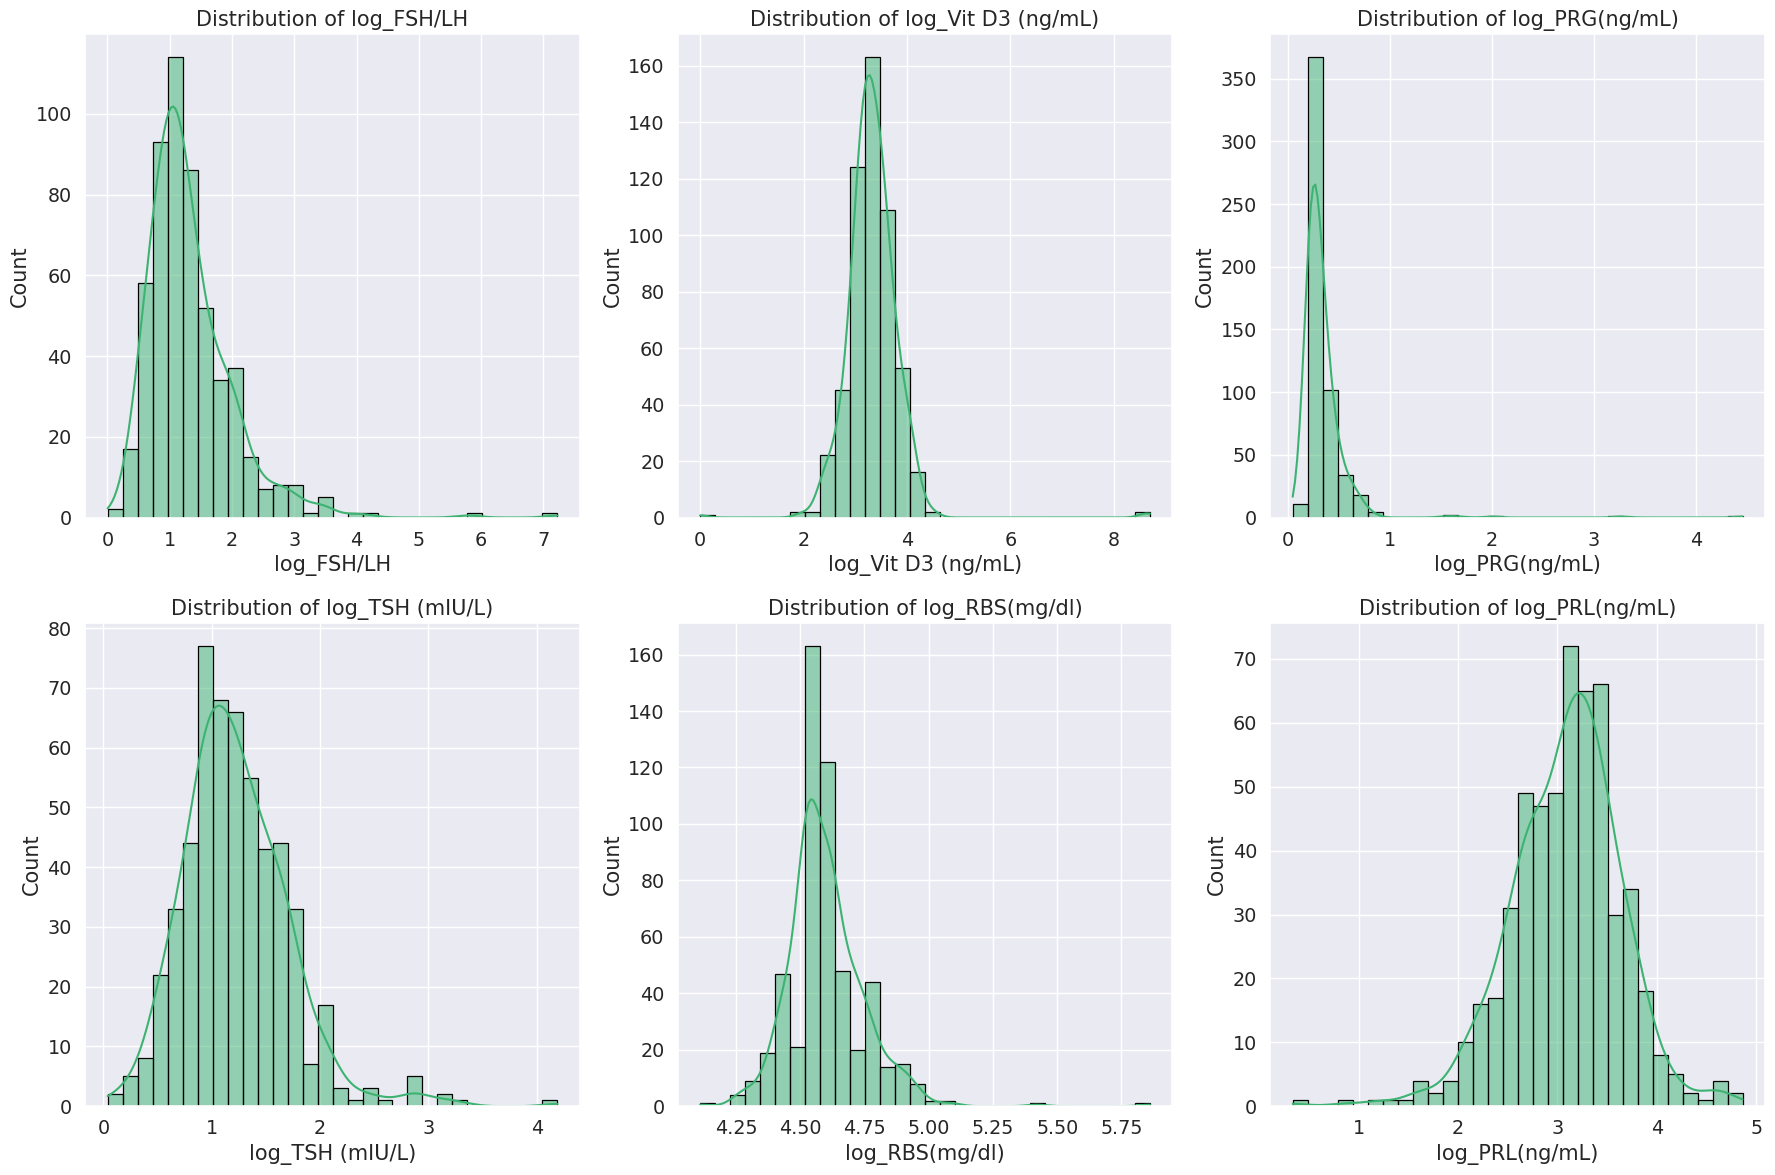

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter columns that were log-transformed
log_transformed_cols = [col for col in data.columns if col.startswith('log_')]

# Plot histograms + KDE for log-transformed features
plt.figure(figsize=(18, 12))
for i, col in enumerate(log_transformed_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='mediumseagreen', edgecolor='black')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


<ipython-input-33-ce8df43104a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="PCOS (Y/N)", y=col, data=data, palette="Set2")
<ipython-input-33-ce8df43104a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="PCOS (Y/N)", y=col, data=data, palette="Set2")
<ipython-input-33-ce8df43104a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="PCOS (Y/N)", y=col, data=data, palette="Set2")
<ipython-input-33-ce8df43104a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

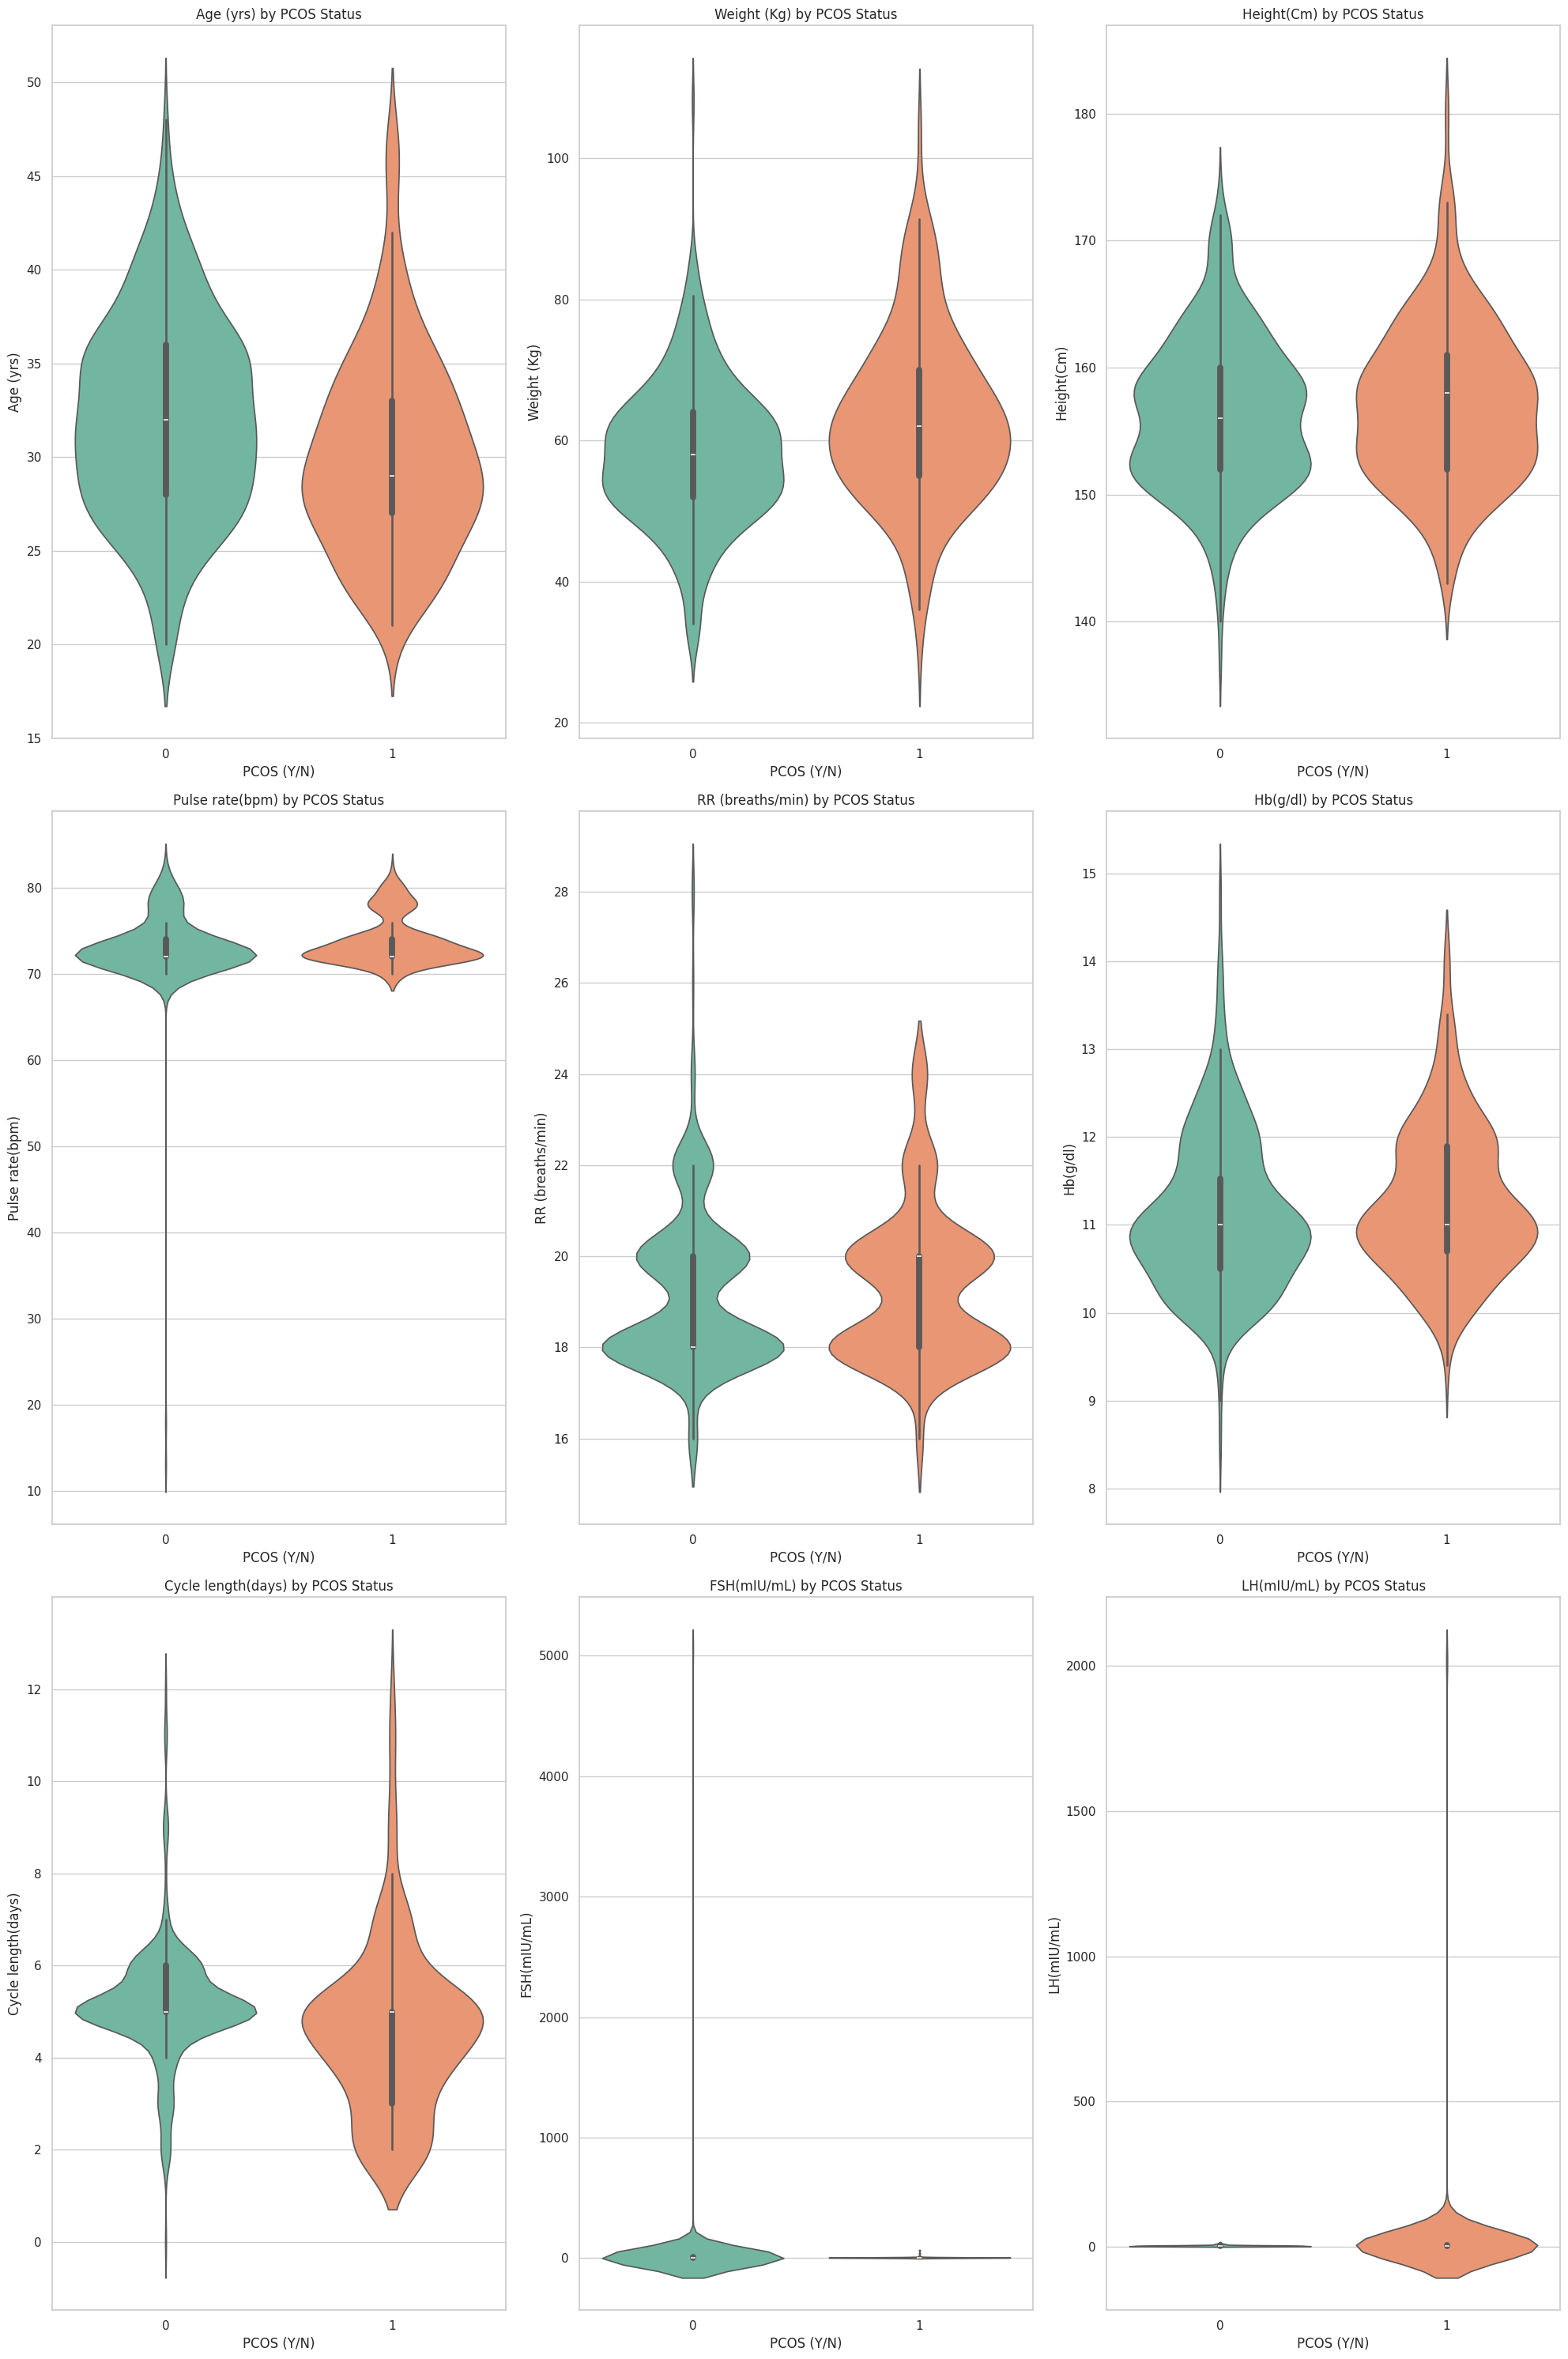

In [33]:
import seaborn as sns

plt.figure(figsize=(20, 30))
for i, col in enumerate(numerical_columns[:9]):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x="PCOS (Y/N)", y=col, data=data, palette="Set2")
    plt.title(f"{col} by PCOS Status")
plt.tight_layout()
plt.show()


## Hormonal and Metabolic Ratios (Boxplots)

<ipython-input-17-1ce7ac0bf2c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PCOS (Y/N)", y=col, data=data, palette="Set2", ax=axes[i])
<ipython-input-17-1ce7ac0bf2c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PCOS (Y/N)", y=col, data=data, palette="Set2", ax=axes[i])
<ipython-input-17-1ce7ac0bf2c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PCOS (Y/N)", y=col, data=data, palette="Set2", ax=axes[i])
<ipython-input-17-1ce7ac0bf2c2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

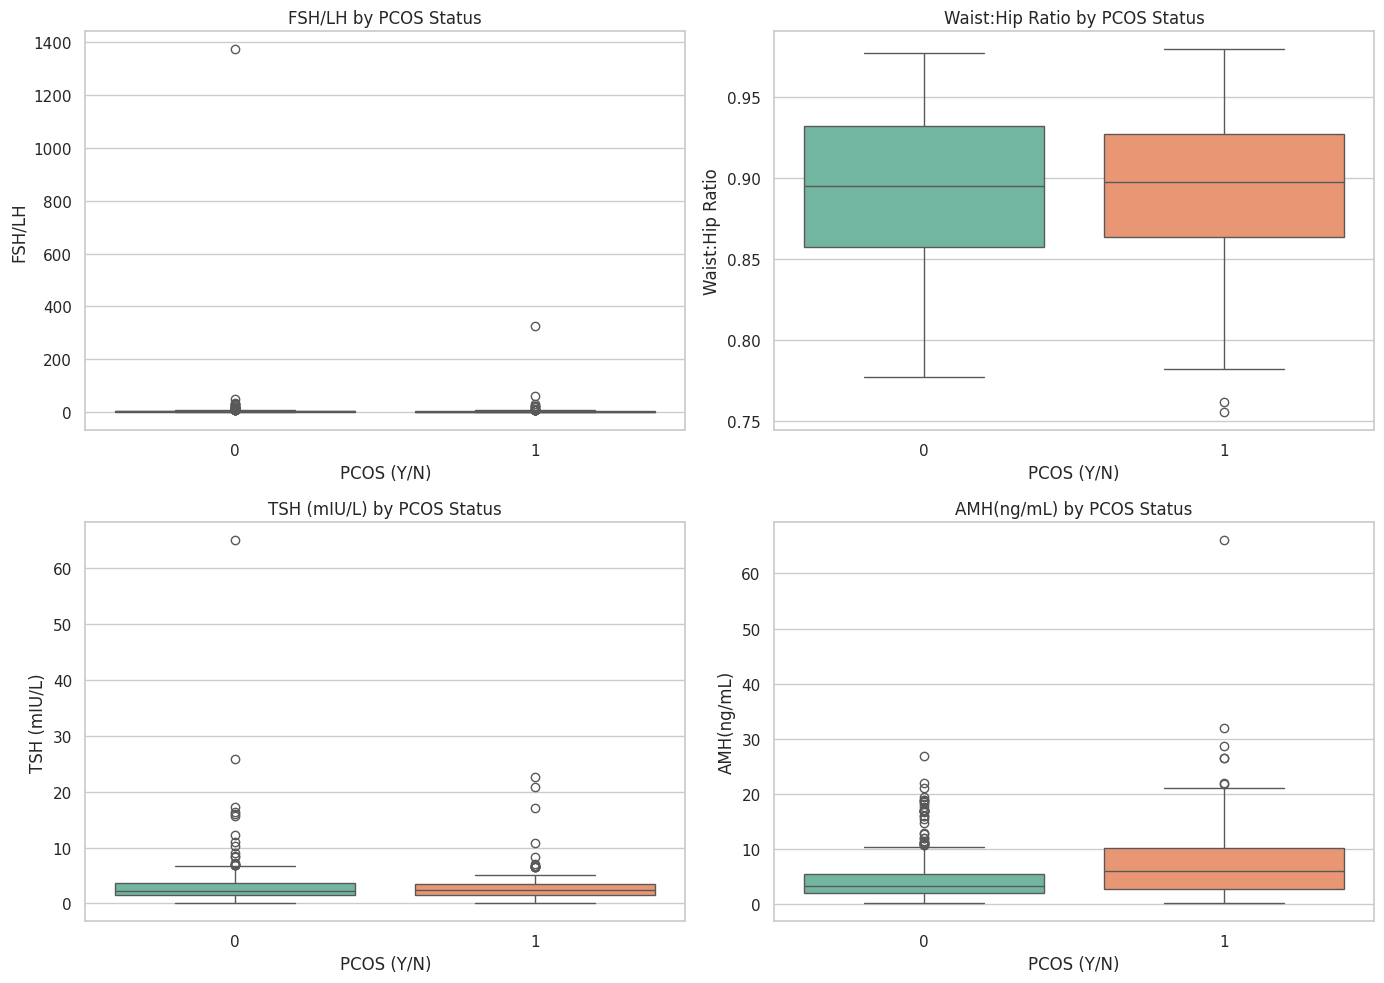

In [ ]:
hormonal = ["FSH/LH", "Waist:Hip Ratio", "TSH (mIU/L)", "AMH(ng/mL)"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(hormonal):
    sns.boxplot(x="PCOS (Y/N)", y=col, data=data, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} by PCOS Status")

plt.tight_layout()
plt.show()


##  Vital Signs & Breathing Rates

<ipython-input-18-d5527d2c3b1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="PCOS (Y/N)", y=col, data=data, palette="pastel", ax=axes[i])
<ipython-input-18-d5527d2c3b1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="PCOS (Y/N)", y=col, data=data, palette="pastel", ax=axes[i])
<ipython-input-18-d5527d2c3b1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="PCOS (Y/N)", y=col, data=data, palette="pastel", ax=axes[i])
<ipython-input-18-d5527d2c3b1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

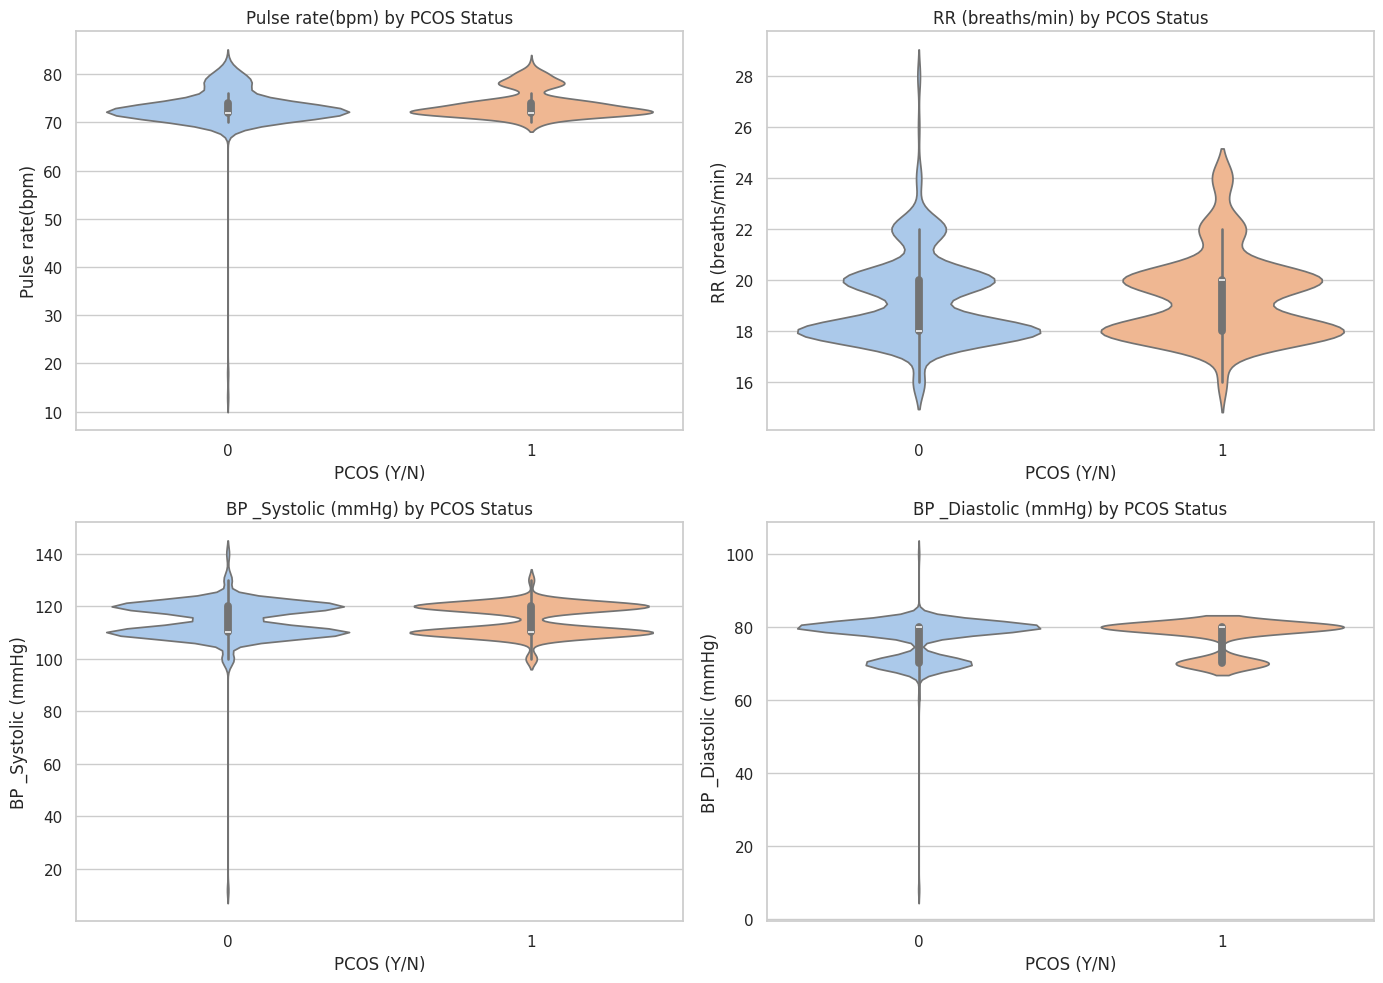

In [ ]:
vitals = ["Pulse rate(bpm)", "RR (breaths/min)", "BP _Systolic (mmHg)", "BP _Diastolic (mmHg)"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(vitals):
    sns.violinplot(x="PCOS (Y/N)", y=col, data=data, palette="pastel", ax=axes[i])
    axes[i].set_title(f"{col} by PCOS Status")

plt.tight_layout()
plt.show()


## Fertility & Marital Status Factors

<ipython-input-19-ba981e5308d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PCOS (Y/N)", y=col, data=data, palette="coolwarm", ax=axes[i])
<ipython-input-19-ba981e5308d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PCOS (Y/N)", y=col, data=data, palette="coolwarm", ax=axes[i])
<ipython-input-19-ba981e5308d2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PCOS (Y/N)", y=col, data=data, palette="coolwarm", ax=axes[i])


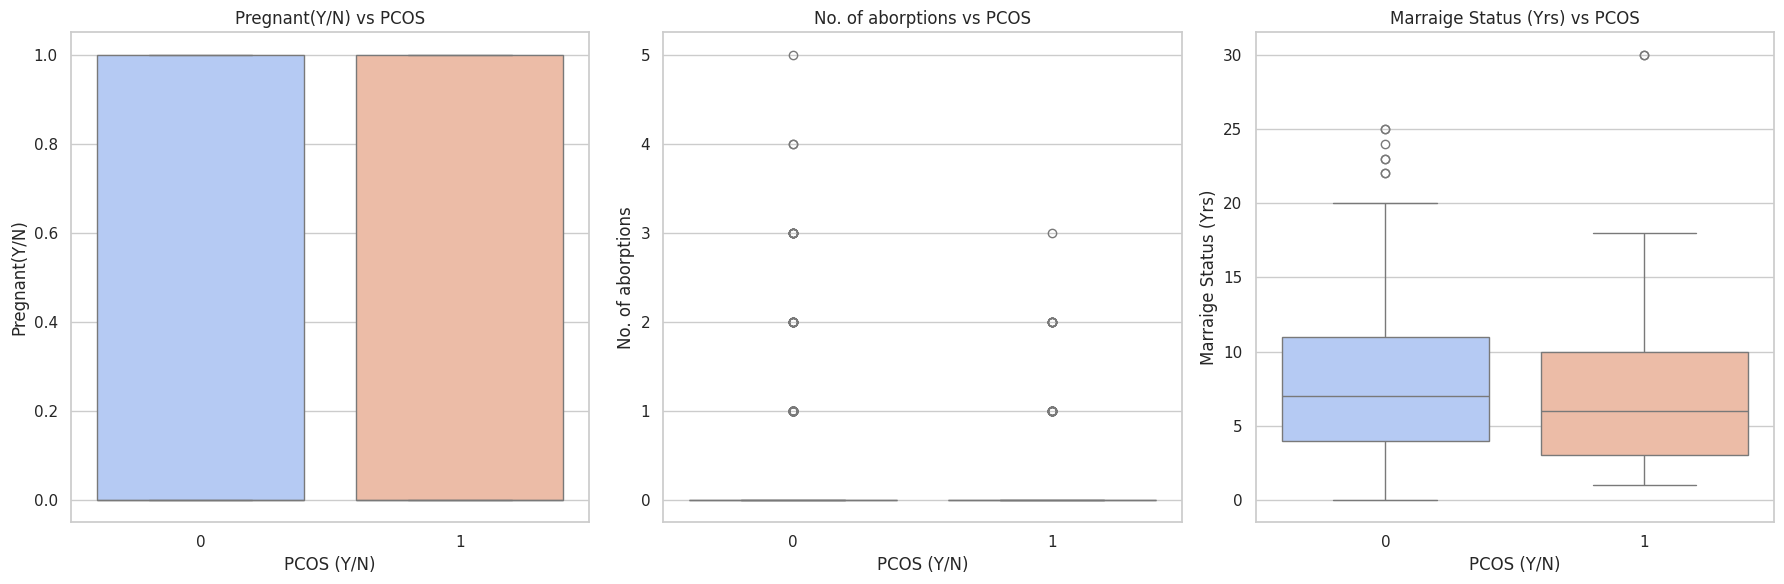

In [ ]:
fertility = ["Pregnant(Y/N)", "No. of aborptions", "Marraige Status (Yrs)"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(fertility):
    sns.boxplot(x="PCOS (Y/N)", y=col, data=data, palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"{col} vs PCOS")

plt.tight_layout()
plt.show()


## Lifestyle Factors (Count Plots)

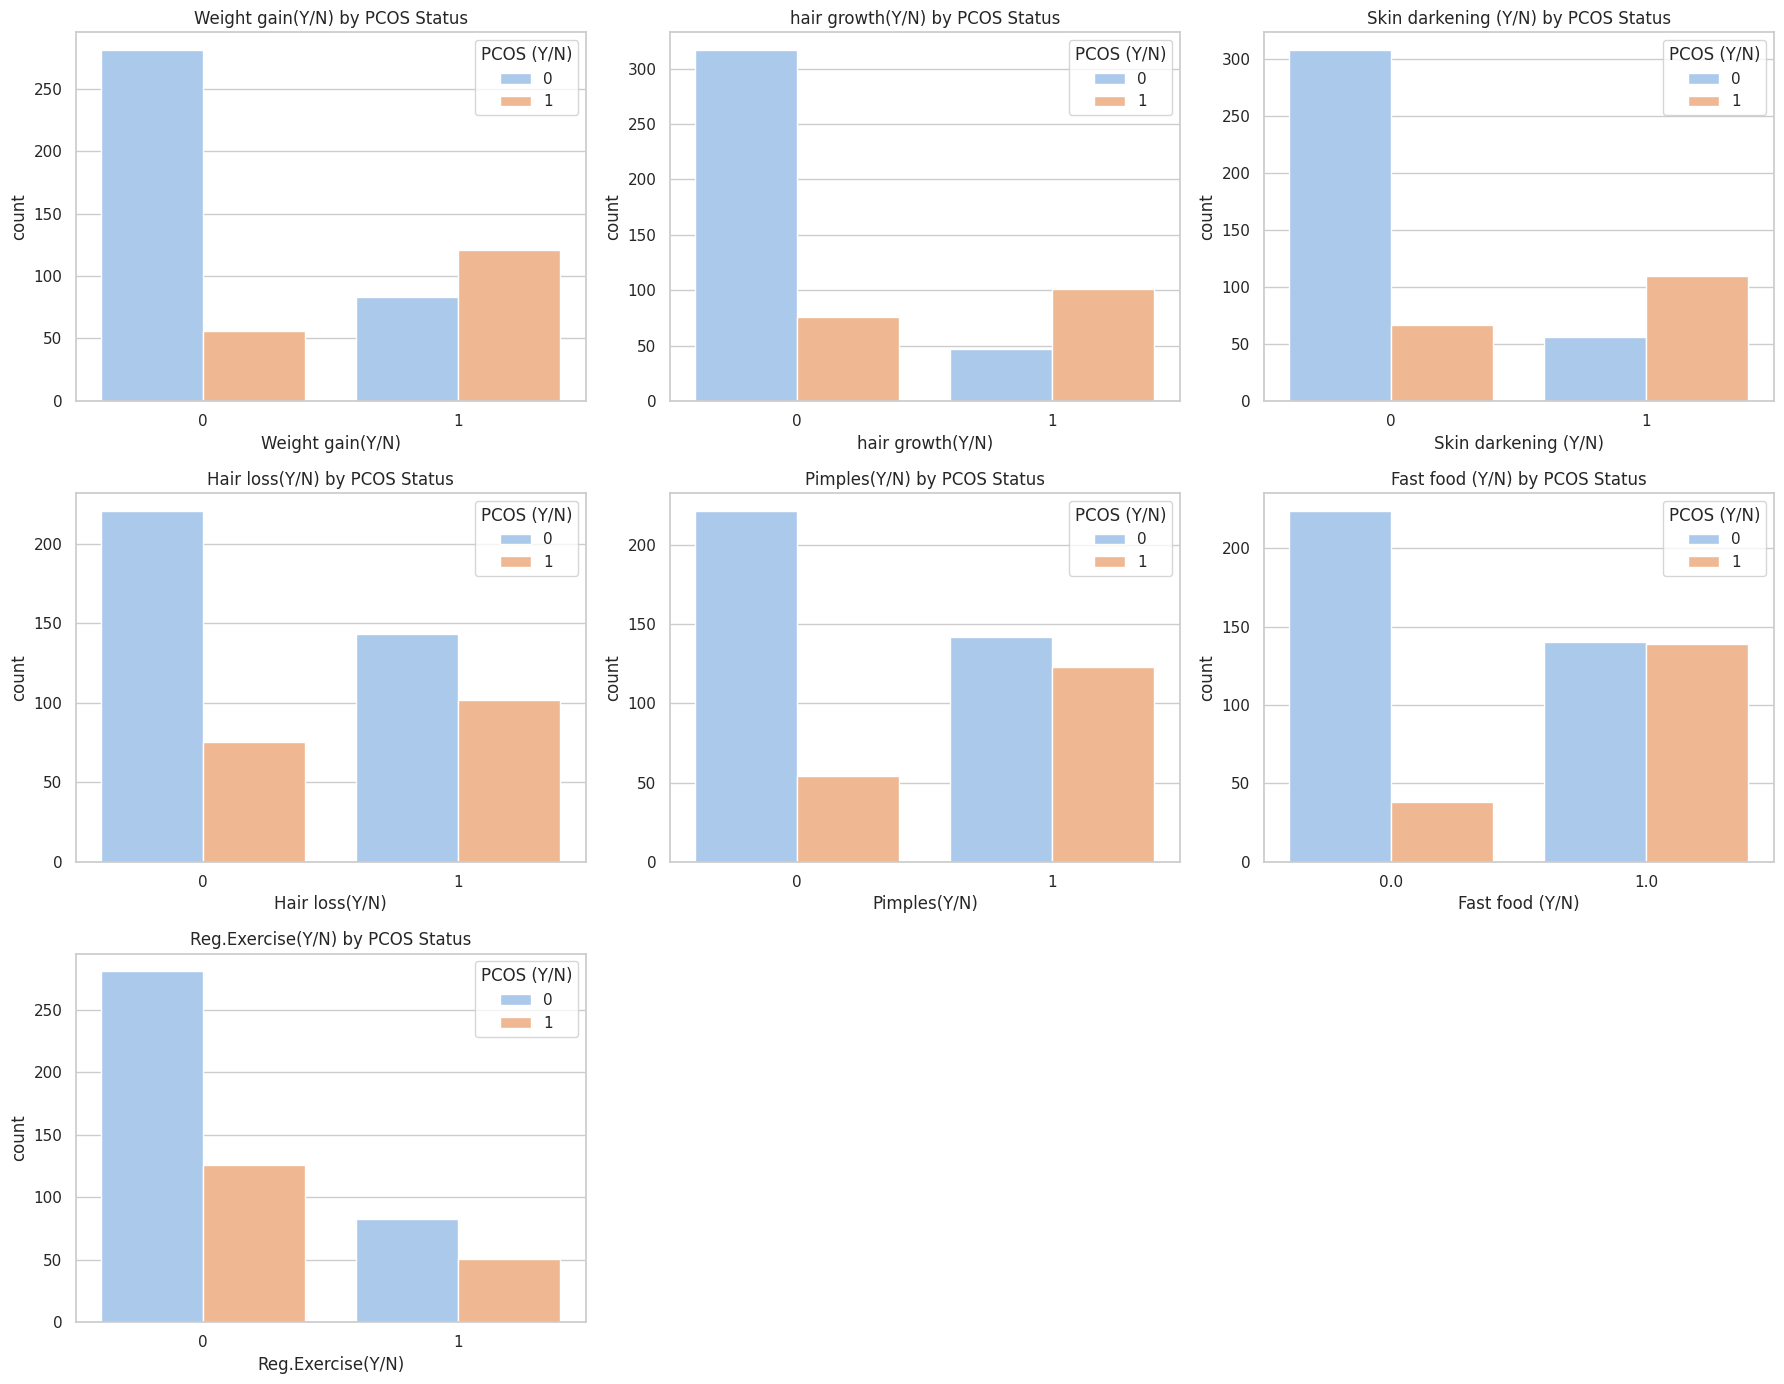

In [ ]:
lifestyle = ["Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)",
             "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)"]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(lifestyle):
    sns.countplot(x=col, hue="PCOS (Y/N)", data=data, palette="pastel", ax=axes[i])
    axes[i].set_title(f"{col} by PCOS Status")

# Hide any unused subplots
for j in range(len(lifestyle), 9):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Just trying  Principal Component Analysis (PCA)

In [93]:
print(data.head(2))

   Sl. No  Patient File No.  PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)  \
0       1                 1           0         28         44.6       152.0   
1       2                 2           0         36         65.0       161.5   

   Blood Group  Pulse rate(bpm)  RR (breaths/min)  Hb(g/dl)  ...  \
0           15               78                22     10.48  ...   
1           15               74                20     11.70  ...   

   Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  \
0                  18.0                  18.0               8.5   
1                  15.0                  14.0               3.7   

   Cycle_Length_Category  log_FSH/LH  log_Vit D3 (ng/mL)  log_PRG(ng/mL)  \
0               Moderate    1.150675            2.895912        0.451076   
1               Moderate    1.970507            4.131961        0.678034   

   log_TSH (mIU/L)  log_RBS(mg/dl)  log_PRL(ng/mL)  
0         0.518794        4.532599        3.832114  
1         1.425515  

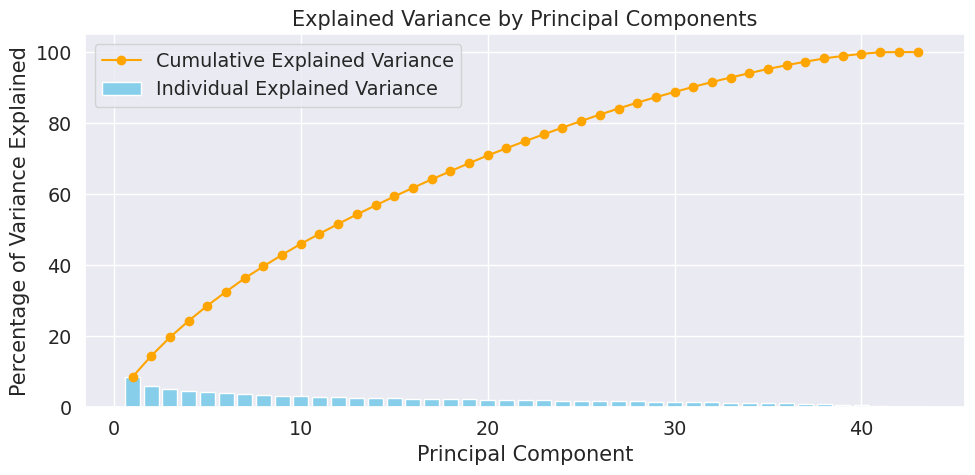

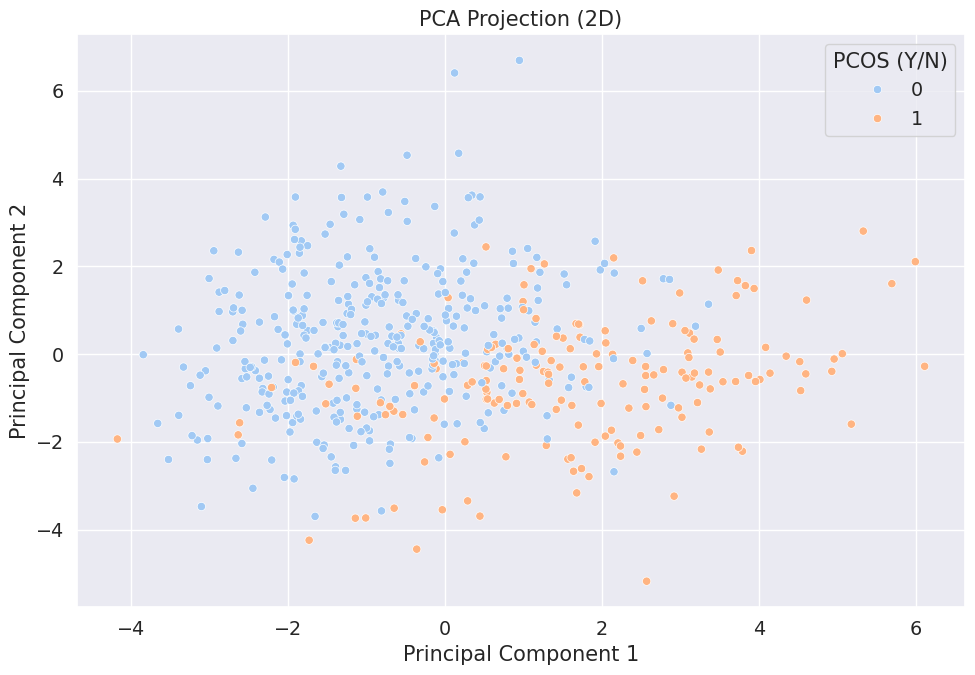

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Identify variable types
categorical_cols = data.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Drop target and ID columns from features
features = data.drop(columns=["PCOS (Y/N)", "Sl. No", "Patient File No."])

# Convert categorical to dummies
features_encoded = pd.get_dummies(features, drop_first=True)

# Standardize the features
X_scaled = StandardScaler().fit_transform(features_encoded)

# Run PCA
pca = PCA(n_components=None)
X_pca_full = pca.fit_transform(X_scaled)

# Explained variance for all components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot: Percentage of variance explained by each component
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance)+1), explained_variance * 100, color='skyblue', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance * 100, marker='o', color='orange', label='Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot using first two components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_full[:, 0], y=X_pca_full[:, 1], hue=data["PCOS (Y/N)"], palette="pastel")
plt.title("PCA Projection (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


The PCA plot above shows the separation of the two groups, PCOS (Y/N), along the first two principal components. The blue points (PCOS = 0) are mostly concentrated around the center, while the orange points (PCOS = 1) are spread across a broader range. This suggests that there are distinct patterns in the data that separate individuals with and without PCOS. The spread of both groups indicates some overlap, but the PCA highlights underlying variance that may be useful for classification.

## LET'S BUILD MODELLLLSSS

## Random Forest Model

Fitting 7 folds for each of 240 candidates, totalling 1680 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
560 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
305 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 150}
Final Test Accuracy: 0.8711656441717791

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       110
           1       0.94      0.64      0.76        53

    accuracy                           0.87       163
   macro avg       0.90      0.81      0.84       163
weighted avg       0.88      0.87      0.86       163



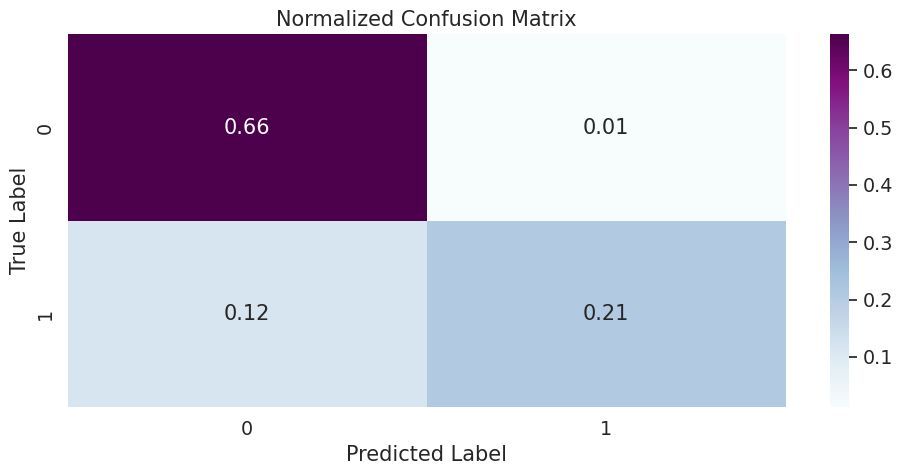

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clean and prepare the dataset
# Drop identifiers and encode categoricals
X = data.drop(columns=["PCOS (Y/N)", "Sl. No", "Patient File No."])
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features
y = data["PCOS (Y/N)"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base model and hyperparameter grid for GridSearch
rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 150, 200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=7, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Train final model with best params
rfc_best = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc_best.fit(X_train, y_train)

# Predict and evaluate
predictions = rfc_best.predict(X_test)
final_accuracy = accuracy_score(y_test, predictions)
classi_report = classification_report(y_test, predictions)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Final Test Accuracy:", final_accuracy)
print("\nClassification Report:\n", classi_report)

# Confusion Matrix - Normalized
plt.figure(figsize=(10, 5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2f",
            annot_kws={'size': 15}, cmap='BuPu')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


## NEURAL NETWORK HERE

In [98]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.3 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.8552631735801697

Best val_accuracy So Far: 0.8815789222717285
Total elapsed time: 00h 01m 37s
Best Hyperparameters: {'units_1': 96, 'act_1': 'tanh', 'second_layer': True, 'optimizer': 'adam', 'units_2': 112, 'act_2': 'tanh'}
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       110
           1       0.83      0.72      0.77        53

    accuracy                           0.86       163
   macro avg       0.85      0.82      0.83       163
weighted avg       0.86      0.86      0.86       163



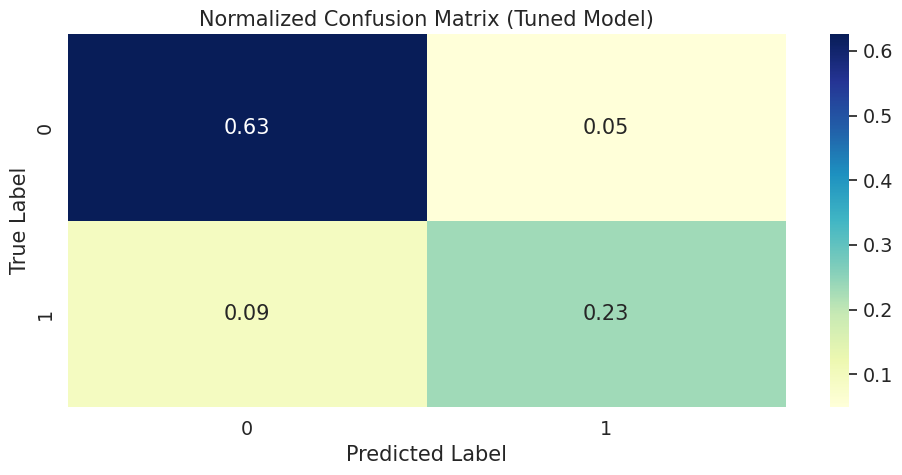

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
import keras_tuner as kt

# Prepare the dataset
X_raw = data.drop(columns=["PCOS (Y/N)", "Sl. No", "Patient File No."])
X = pd.get_dummies(X_raw, drop_first=True)
y = data["PCOS (Y/N)"]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model function for tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=16),
                    activation=hp.Choice('act_1', ['relu', 'tanh']),
                    input_shape=(X_train_scaled.shape[1],)))

    if hp.Boolean('second_layer'):
        model.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=16),
                        activation=hp.Choice('act_2', ['relu', 'tanh'])))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperparameter tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='pcos_nn_tuning'
)

# Run search
tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2, verbose=1)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]
best_params = tuner.get_best_hyperparameters(1)[0].values
print("Best Hyperparameters:", best_params)

# Evaluate
pred_probs = best_model.predict(X_test_scaled)
predictions = (pred_probs > 0.5).astype(int).flatten()

print("\nClassification Report:\n", classification_report(y_test, predictions))

# Confusion matrix
plt.figure(figsize=(10, 5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt=".2f",
            annot_kws={'size': 15}, cmap='YlGnBu')
plt.title("Normalized Confusion Matrix (Tuned Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


## SVM

<ipython-input-101-43a547109b9e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_r")


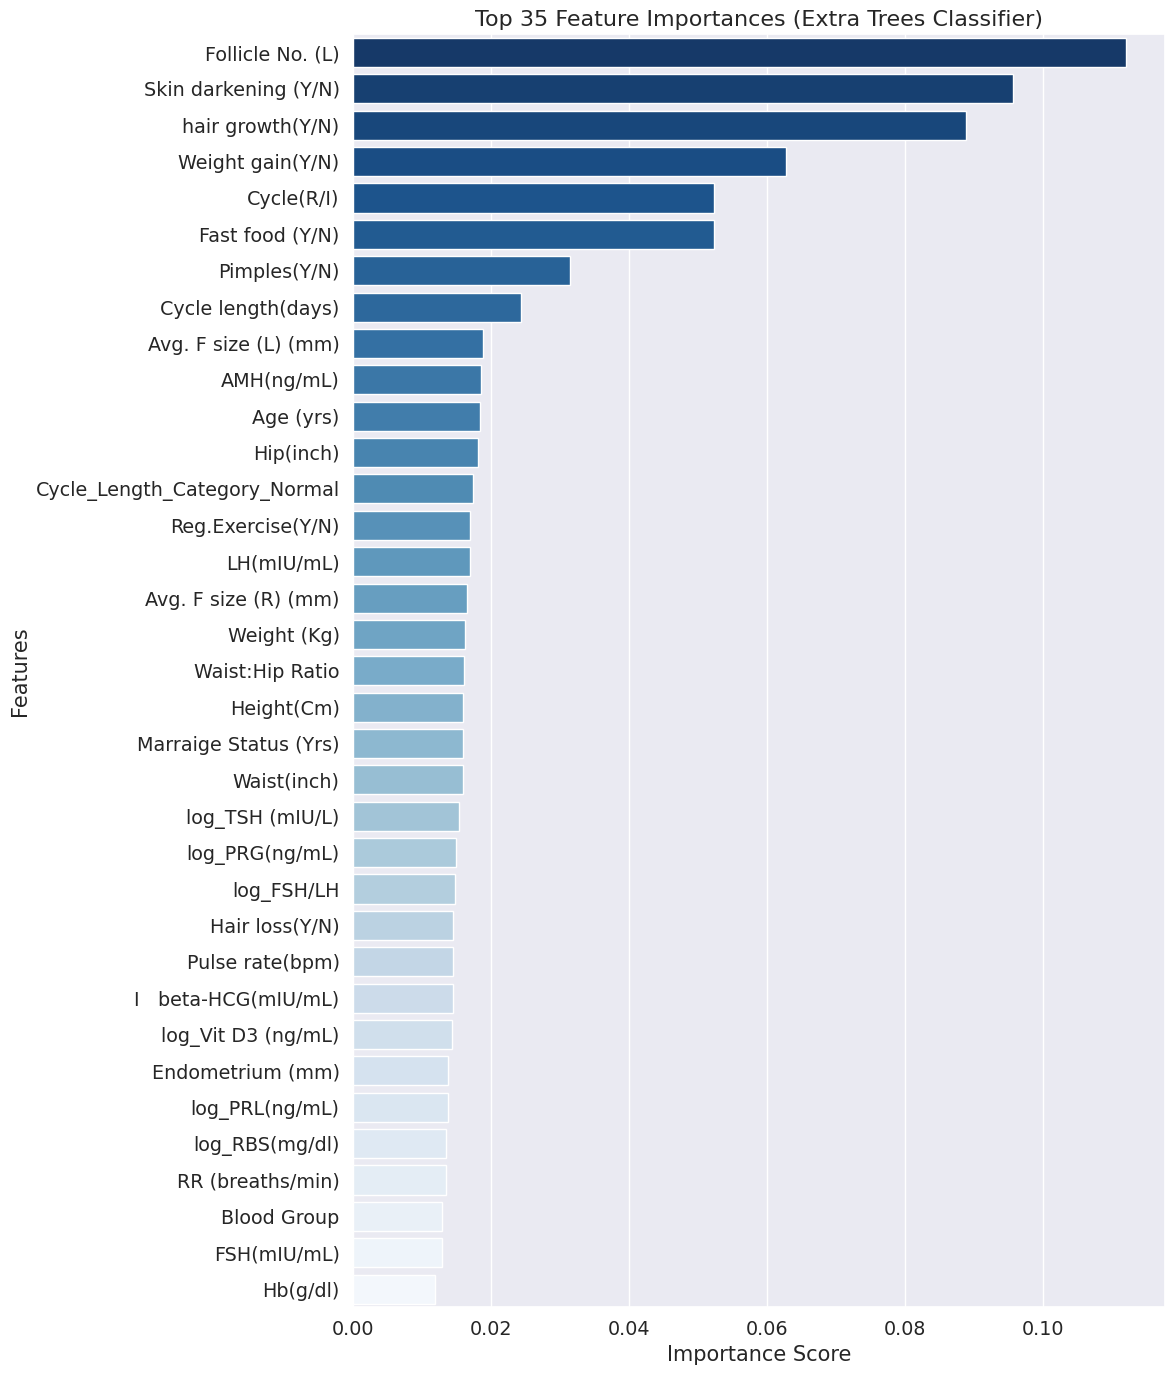

<ipython-input-101-43a547109b9e>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PCOS (Y/N)", data=y_sm_df, palette="pastel")


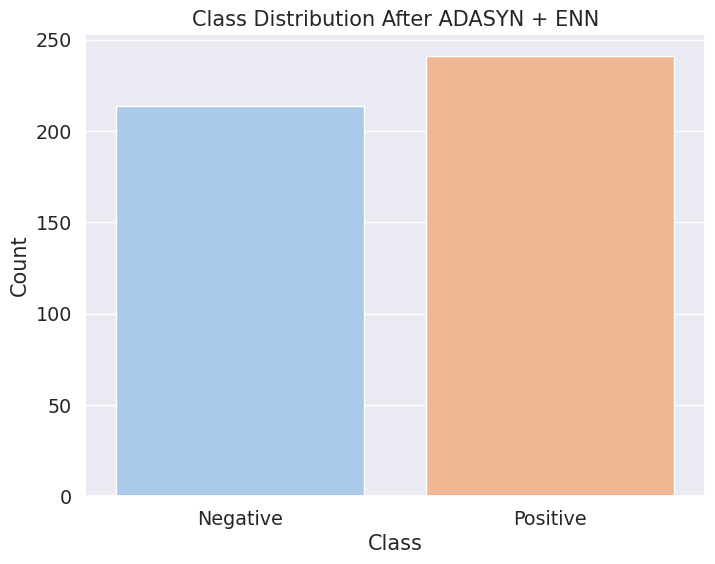

In [101]:
# 🧱 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours

# ✅ Step 1: Separate features (X) and target (y)
X_raw = data.drop(columns=["PCOS (Y/N)", "Sl. No", "Patient File No."])
y = data["PCOS (Y/N)"]

# ✅ Step 2: Encode categorical variables to numeric (e.g., 'Moderate' → dummy vars)
X = pd.get_dummies(X_raw, drop_first=True)

# ✅ Step 3: Feature importance using ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(35)

# ✅ Step 4: Plot top 35 feature importances
plt.figure(figsize=(12, 14))
sns.barplot(x=top_features.values, y=top_features.index, palette="Blues_r")
plt.title("Top 35 Feature Importances (Extra Trees Classifier)", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# ✅ Step 5: Select top 9 features and create filtered dataset
top_9_features = feat_importances.nlargest(9)
df_top9 = X[top_9_features.index]  # using encoded data now!

# ✅ Step 6: Balance the dataset using ADASYN + ENN
ada = ADASYN(sampling_strategy='minority', n_neighbors=3, random_state=42)
X_ada, y_ada = ada.fit_resample(df_top9, y)

enn = EditedNearestNeighbours(sampling_strategy='all', n_neighbors=3)
X_sm, y_sm = enn.fit_resample(X_ada, y_ada)

# ✅ Step 7: Visualize class distribution after balancing
y_sm_df = pd.DataFrame(y_sm, columns=['PCOS (Y/N)'])
plt.figure(figsize=(8, 6))
sns.countplot(x="PCOS (Y/N)", data=y_sm_df, palette="pastel")
plt.title("Class Distribution After ADASYN + ENN")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best SVM Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
✅ Accuracy: 0.978021978021978
✅ Precision: 0.9615384615384616
✅ Recall: 1.0
✅ F1 Score: 0.9803921568627451

📄 Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.95      0.97        41
    Positive       0.96      1.00      0.98        50

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



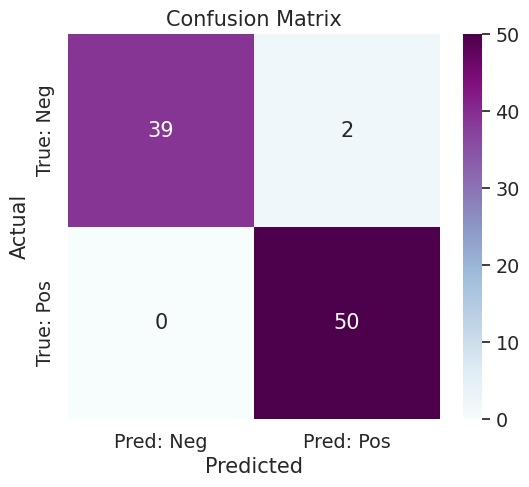

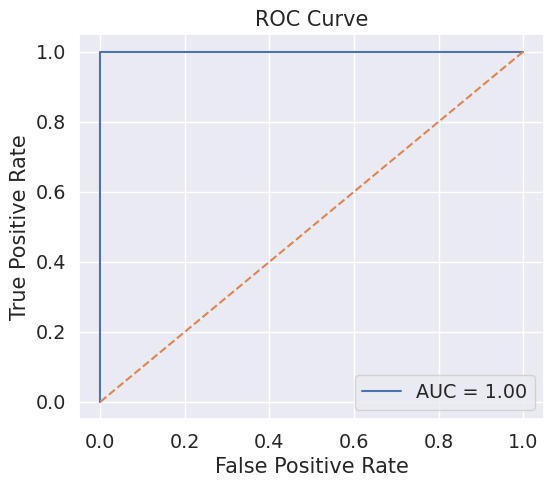

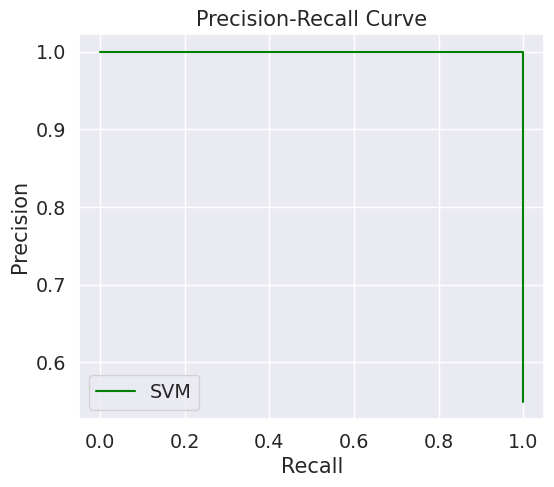

<ipython-input-103-cee4762d1ff8>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), y='Feature', x='Importance', palette='pastel')


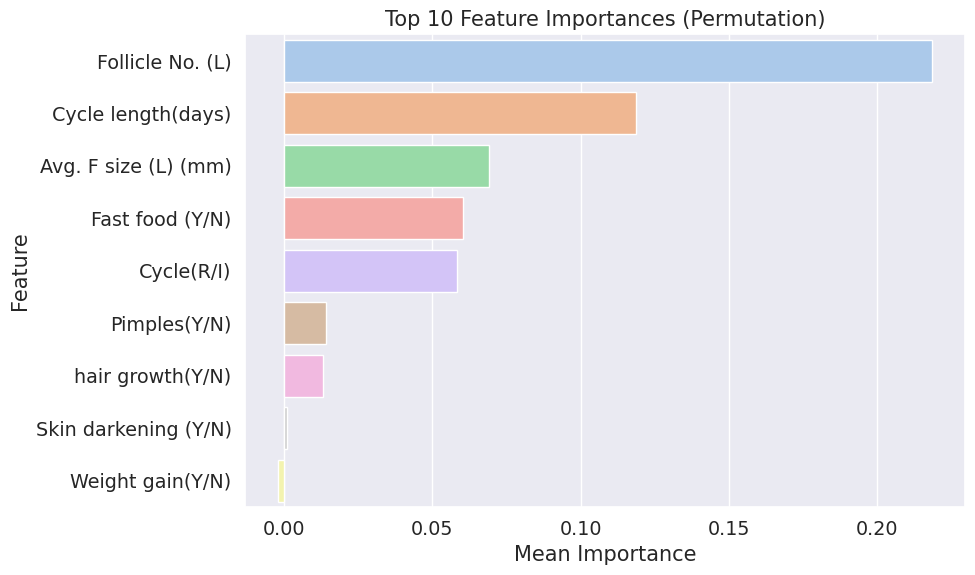

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve,
    roc_auc_score, precision_recall_curve, accuracy_score
)
from sklearn.inspection import permutation_importance

# ✅ Step 7: Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=12)

# ✅ Step 8: SVM Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}
grid = GridSearchCV(SVC(probability=True), param_grid, refit=True, cv=5, verbose=1, scoring='recall')
grid.fit(X_train, np.ravel(y_train))

# ✅ Step 9: Best model
best_svm = grid.best_estimator_
print("Best SVM Parameters:", grid.best_params_)

# ✅ Step 10: Model prediction and evaluation
y_pred = best_svm.predict(X_test)
y_probs = best_svm.predict_proba(X_test)[:, 1]
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve
)


# Metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))

# Classification report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='BuPu',
            xticklabels=["Pred: Neg", "Pred: Pos"], yticklabels=["True: Neg", "True: Pos"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label="SVM", color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Step 11: Permutation feature importance
result = permutation_importance(best_svm, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), y='Feature', x='Importance', palette='pastel')
plt.title('Top 10 Feature Importances (Permutation)')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# EXB


In [107]:
#EXB
!pip install interpret --quiet

In [109]:
# 📦 Imports
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ✅ 1. Use balanced dataset (from ADASYN + ENN)
X = X_sm
y = y_sm

# ✅ 2. Split into train-test
X_train_ebm, X_test_ebm, y_train_ebm, y_test_ebm = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 3. Set hyperparameter grid
param_grid = {
    'interactions': [0, 5, 10],                 # Number of interaction terms
    'learning_rate': [0.01, 0.05, 0.1],         # Learning rate
    'max_bins': [128, 256],                     # Histogram bin count
    'max_leaves': [3, 5, 7]                     # Tree complexity
}

# ✅ 4. Tune using GridSearchCV
ebm_base = ExplainableBoostingClassifier(random_state=42)
grid_search_ebm = GridSearchCV(estimator=ebm_base, param_grid=param_grid,
                               scoring='recall', cv=5, n_jobs=-1, verbose=1)

grid_search_ebm.fit(X_train_ebm, y_train_ebm)

# ✅ 5. Train best model
best_ebm = grid_search_ebm.best_estimator_
y_pred_ebm = best_ebm.predict(X_test_ebm)

# ✅ 6. Evaluation
print("Best Parameters:", grid_search_ebm.best_params_)
print("Accuracy:", accuracy_score(y_test_ebm, y_pred_ebm))
print("\n📄 Classification Report:\n", classification_report(y_test_ebm, y_pred_ebm, target_names=["Negative", "Positive"]))

# ✅ 7. Visual Dashboard (Feature Importance & Shape Functions)
ebm_global = best_ebm.explain_global()
show(ebm_global)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
✅ Best Parameters: {'interactions': 5, 'learning_rate': 0.01, 'max_bins': 128, 'max_leaves': 7}
✅ Accuracy: 0.9560439560439561

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.95      0.95      0.95        44
    Positive       0.96      0.96      0.96        47

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



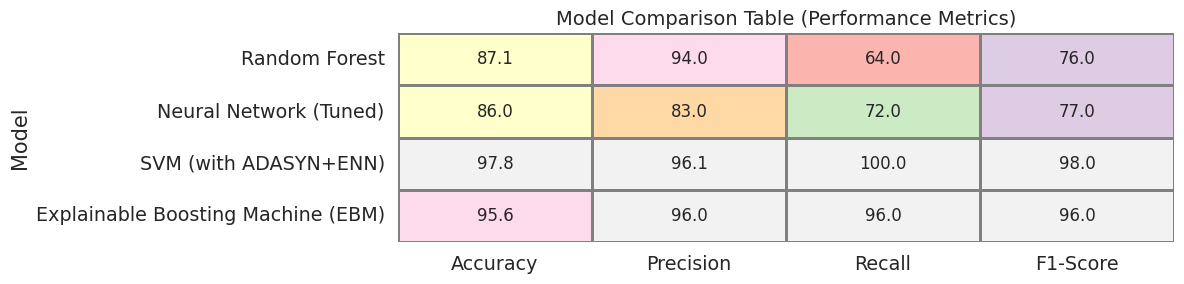

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create model performance summary
model_summary = pd.DataFrame([
    {
        "Model": "Random Forest",
        "Best Hyperparameters": "max_depth=8, max_features='sqrt', n_estimators=150",
        "Accuracy": 87.1,
        "Precision": 94.0,
        "Recall": 64.0,
        "F1-Score": 76.0
    },
    {
        "Model": "Neural Network (Tuned)",
        "Best Hyperparameters": "units_1=96, act_1='tanh', units_2=112, act_2='tanh', optimizer='adam'",
        "Accuracy": 86.0,
        "Precision": 83.0,
        "Recall": 72.0,
        "F1-Score": 77.0
    },
    {
        "Model": "SVM (with ADASYN+ENN)",
        "Best Hyperparameters": "kernel='rbf', C=100, gamma='auto'",
        "Accuracy": 97.8,
        "Precision": 96.1,
        "Recall": 100.0,
        "F1-Score": 98.0
    },
    {
        "Model": "Explainable Boosting Machine (EBM)",
        "Best Hyperparameters": "interactions=5, learning_rate=0.01, max_bins=128, max_leaves=7",
        "Accuracy": 95.6,
        "Precision": 96.0,
        "Recall": 96.0,
        "F1-Score": 96.0
    }
])

# Plot as a colored table using seaborn
fig, ax = plt.subplots(figsize=(12, 3))
sns.set_theme(style="whitegrid")
sns.heatmap(model_summary.drop(columns=["Best Hyperparameters"]).set_index("Model"),
            annot=True, fmt=".1f", cmap="Pastel1", cbar=False, linewidths=1, linecolor='gray', ax=ax)
plt.title("Model Comparison Table (Performance Metrics)", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-117-3440aa4929ae>:63: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



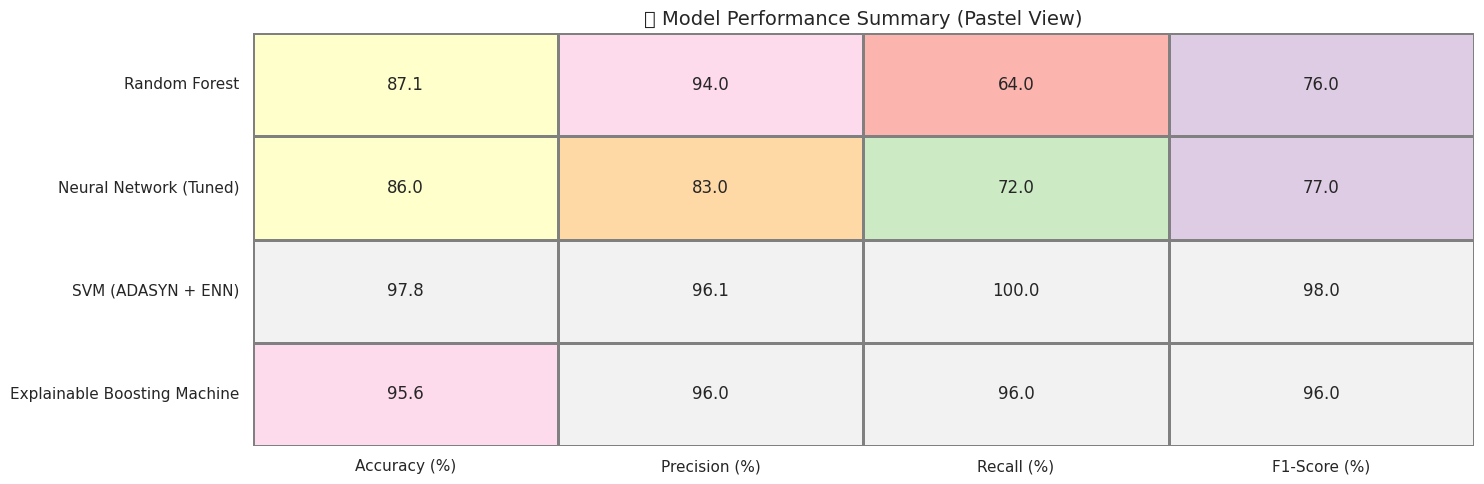


Full Summary with Hyperparameters and Remarks:
                       Model                                                  Best Hyperparameters                                                      Remarks
               Random Forest                    max_depth=8, max_features='sqrt', n_estimators=150     Good precision, but low recall → misses many PCOS cases.
      Neural Network (Tuned) units_1=96, units_2=112, act_1='tanh', act_2='tanh', optimizer='adam'         Improved recall, identifies more PCOS cases than RF.
          SVM (ADASYN + ENN)                                     kernel='rbf', C=100, gamma='auto'        Best model — perfect recall with very high precision.
Explainable Boosting Machine        interactions=5, learning_rate=0.01, max_bins=128, max_leaves=7 Excellent accuracy + interpretability. Great for healthcare.


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the full model summary
df = pd.DataFrame([
    {
        "Model": "Random Forest",
        "Best Hyperparameters": "max_depth=8, max_features='sqrt', n_estimators=150",
        "Accuracy (%)": 87.1,
        "Precision (%)": 94.0,
        "Recall (%)": 64.0,
        "F1-Score (%)": 76.0,
        "Remarks": "Good precision, but low recall → misses many PCOS cases."
    },
    {
        "Model": "Neural Network (Tuned)",
        "Best Hyperparameters": "units_1=96, units_2=112, act_1='tanh', act_2='tanh', optimizer='adam'",
        "Accuracy (%)": 86.0,
        "Precision (%)": 83.0,
        "Recall (%)": 72.0,
        "F1-Score (%)": 77.0,
        "Remarks": "Improved recall, identifies more PCOS cases than RF."
    },
    {
        "Model": "SVM (ADASYN + ENN)",
        "Best Hyperparameters": "kernel='rbf', C=100, gamma='auto'",
        "Accuracy (%)": 97.8,
        "Precision (%)": 96.1,
        "Recall (%)": 100.0,
        "F1-Score (%)": 98.0,
        "Remarks": "Best model — perfect recall with very high precision."
    },
    {
        "Model": "Explainable Boosting Machine",
        "Best Hyperparameters": "interactions=5, learning_rate=0.01, max_bins=128, max_leaves=7",
        "Accuracy (%)": 95.6,
        "Precision (%)": 96.0,
        "Recall (%)": 96.0,
        "F1-Score (%)": 96.0,
        "Remarks": "Excellent accuracy + interpretability. Great for healthcare."
    }
])

# 🎨 Plot pastel-colored heatmap
plt.figure(figsize=(15, 3 + 0.5 * len(df)))
sns.set_theme(style="whitegrid")
table_plot = sns.heatmap(
    df[["Accuracy (%)", "Precision (%)", "Recall (%)", "F1-Score (%)"]]
    .set_index(df["Model"]),
    annot=True,
    fmt=".1f",
    cmap="Pastel1",  # ✅ Use a valid colormap
    linewidths=1,
    linecolor="gray",
    cbar=False
)

plt.title("📊 Model Performance Summary (Pastel View)", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 📝 Print full textual summary below
print("\nFull Summary with Hyperparameters and Remarks:")
print(df[["Model", "Best Hyperparameters", "Remarks"]].to_string(index=False))
